In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

%matplotlib inline

In [32]:
df_titanic = pd.read_csv('./data_titanic/titanic_clean.csv')
df_titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [33]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          891 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


## Cleaning Dataset

In [34]:
# df_titanic.drop(df_titanic['Unnamed: 0'], inplace=True)
del df_titanic['Unnamed: 0']

In [35]:
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [36]:
labelencoder = LabelEncoder()

In [37]:
df_titanic['Sex'] = labelencoder.fit_transform(df_titanic['Sex'])

In [38]:
df_titanic = pd.get_dummies(data=df_titanic, columns=['Embarked'],prefix_sep='-')

In [39]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked-C,Embarked-Q,Embarked-S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1


In [40]:
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked-C,Embarked-Q,Embarked-S
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.00,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.45,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,1,0,0
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,0,1,0


In [41]:
for i in df_titanic:
    df_titanic['Family'] = df_titanic['SibSp'] + df_titanic['Parch']
    df_titanic["Alone"] = [1 if i == 0 else 0 for i in df_titanic['Family']]

In [42]:
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked-C,Embarked-Q,Embarked-S,Family,Alone
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.00,0,0,1,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.45,0,0,1,3,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,1,0,0,0,1
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,0,1,0,0,1


In [43]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked-C   891 non-null    uint8  
 11  Embarked-Q   891 non-null    uint8  
 12  Embarked-S   891 non-null    uint8  
 13  Family       891 non-null    int64  
 14  Alone        891 non-null    int64  
dtypes: float64(2), int32(1), int64(7), object(2), uint8(3)
memory usage: 82.8+ KB


<AxesSubplot:>

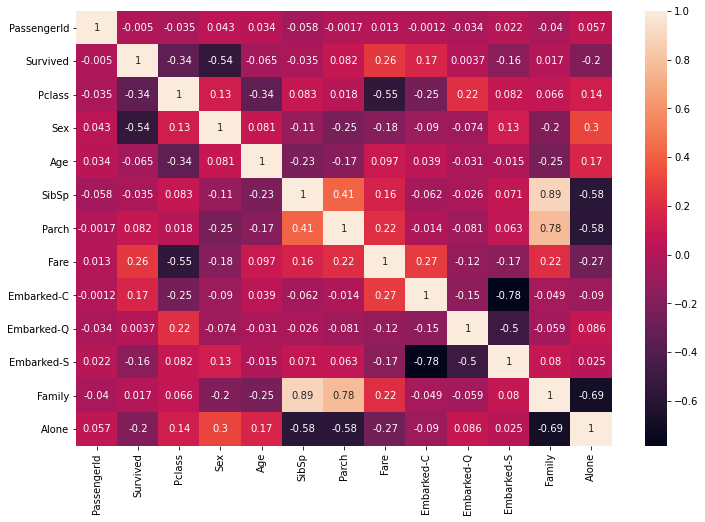

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(df_titanic.corr(), annot=True)

## Dataset Splitting

In [45]:
X = df_titanic.drop(columns=['PassengerId', 'Name', 'Survived', 'Ticket'])
y = df_titanic['Survived']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

## Handling Imbalanced Data

In [48]:
sm = SMOTE(random_state = 42)

In [51]:
y_train.value_counts()

0    444
1    268
Name: Survived, dtype: int64

In [52]:
y_test.value_counts()

0    105
1     74
Name: Survived, dtype: int64

In [29]:
df_titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [54]:
X_train, y_train = sm.fit_sample(X_train, y_train)

In [55]:
y_train.value_counts()

1    444
0    444
Name: Survived, dtype: int64

## Model Algorithm

In [57]:
logreg = LogisticRegression()
random_forest = RandomForestClassifier()
svc = SVC()
knn = KNeighborsClassifier(n_neighbors = 3)

## LogReg Base Model

In [58]:
logreg.fit(X_train, y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
print(round(logreg.score(X_train, y_train) * 100, 2), round(logreg.score(X_test, y_test) * 100, 2))

pred_logreg_base = logreg.predict(X_test)
print(classification_report(y_test, pred_logreg_base))
print()
print('Accuracy: ', accuracy_score(y_test, pred_logreg_base))
print()

81.08 81.56
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       105
           1       0.77      0.80      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Accuracy:  0.8156424581005587



## random Forest Base Model

In [60]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
print(round(random_forest.score(X_train, y_train) * 100, 2), round(random_forest.score(X_test, y_test) * 100, 2))

pred_rf_base = random_forest.predict(X_test)
print(classification_report(y_test, pred_rf_base))
print()
print('Accuracy: ', accuracy_score(y_test, pred_rf_base))
print()

98.31 80.45
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179


Accuracy:  0.8044692737430168



## SVM Base Model

In [62]:
svc.fit(X_train, y_train)

SVC()

In [63]:
print(round(svc.score(X_train, y_train) * 100, 2), round(svc.score(X_test, y_test) * 100, 2))

pred_svc_base = svc.predict(X_test)
print(classification_report(y_test, pred_svc_base))
print()
print('Accuracy: ', accuracy_score(y_test, pred_svc_base))
print()

65.65 72.07
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       105
           1       0.67      0.65      0.66        74

    accuracy                           0.72       179
   macro avg       0.71      0.71      0.71       179
weighted avg       0.72      0.72      0.72       179


Accuracy:  0.7206703910614525



## KNN base Model

In [64]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [65]:
print(round(knn.score(X_train, y_train) * 100, 2), round(knn.score(X_test, y_test) * 100, 2))

pred_knn_base = knn.predict(X_test)
print(classification_report(y_test, pred_knn_base))
print()
print('Accuracy: ', accuracy_score(y_test, pred_knn_base))
print()

86.71 73.18
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       105
           1       0.69      0.64      0.66        74

    accuracy                           0.73       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.73      0.73      0.73       179


Accuracy:  0.7318435754189944

